### CSE-221710302060-Shaik Shoaib Aslam

### **Problem Statement**:
    Detecting kyphosis disease at the early stage in children will prevent abnormal spinal vertebrae problems.
    The problem that we are going to solve here is that given a set of features that describe the absence or presence of kyphosis, our machine learning model must predict whether the kyphosis is present or absent. To train our machine learning model with kyphosis data, we will be using  childen dataset 


In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


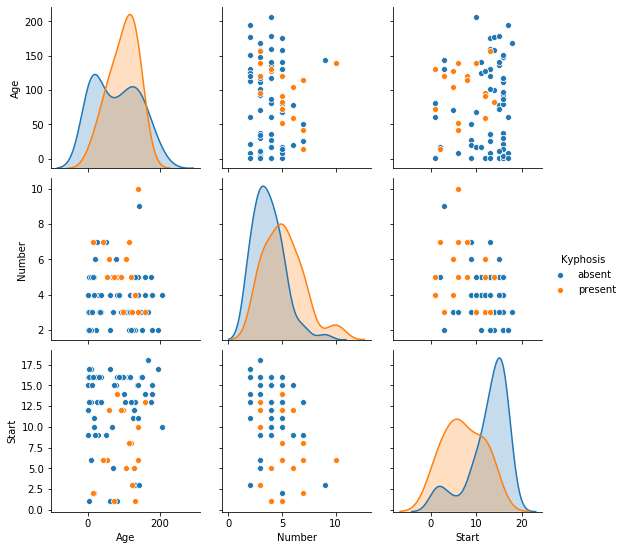

In [4]:
sns.pairplot(df,hue = 'Kyphosis')

In [5]:
# Splitting data into input and output
X = df.drop(['Kyphosis'],axis = 1)
y = df.Kyphosis

In [6]:
# Train=test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [22]:
# Applying Decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
# predicting on train data
y_train_pred = dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [10]:
confusion_matrix(y_train,y_train_pred)

array([[51,  0],
       [ 0, 13]], dtype=int64)

In [11]:
# Predicting on test data
y_test_pred = dtree.predict(X_test)
y_test_pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent'], dtype=object)

In [12]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      absent       0.79      0.85      0.81        13
     present       0.33      0.25      0.29         4

    accuracy                           0.71        17
   macro avg       0.56      0.55      0.55        17
weighted avg       0.68      0.71      0.69        17



In [13]:
confusion_matrix(y_test,y_test_pred)

array([[11,  2],
       [ 3,  1]], dtype=int64)

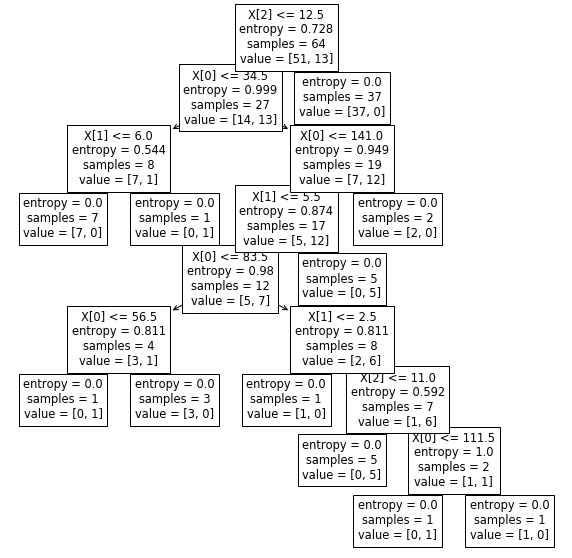

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(dtree)
plt.show()

In [15]:
# KFold CV
from sklearn.model_selection import cross_val_score
cross_val_score(dtree,X_train,y_train,cv=5)

array([0.84615385, 0.92307692, 0.84615385, 0.76923077, 0.75      ])

In [18]:
# Hyperparameters
# GridSearchCV
grid_param = {'criterion' : ['gini','entropy'],
             'max_depth' : range(2,10,1),
             'min_samples_leaf' : range(1,10,1)}

In [23]:
from sklearn.model_selection import GridSearchCV
g_search = GridSearchCV(estimator = dtree,param_grid = grid_param)
g_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [24]:
g_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1}

In [25]:
# We got best parmaters
# initializing DT Classifier
clf = DecisionTreeClassifier(criterion = 'gini', max_depth= 6, min_samples_leaf= 1)

# We need to fit model on data
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
# Prediction on test data
pred_test = clf.predict(X_test)

#Classification report for test data
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

      absent       0.79      0.85      0.81        13
     present       0.33      0.25      0.29         4

    accuracy                           0.71        17
   macro avg       0.56      0.55      0.55        17
weighted avg       0.68      0.71      0.69        17

